<a href="https://colab.research.google.com/github/lara-sj/KNN-demo/blob/main/Predicting_House_Prices_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Sale Prices in Ames, Iowa

## Executive Summary
The goal of this project is to build a model that accurately predict house sale price, based on the characteristics of the property. In this project, I worked with housing data for the city of Ames, Iowa from 2006 to 2010. 

The dataset contains information about 82 different attributes of a home that might be relevant to determining the sale price.

Using a combination of data cleaning and feature engineering, I filtered the information down to the important predictors to be used for regression analysis. Finally, I performed regression analysis on this data to obtain a RMSE of \$24,075.36, or 13.31% on an average sale price of \$180,921.20

### How can we use this data?
We can use the model to answer various questions:
* **determining house prices**
* **which attributes or features increase house sale price?**
* **match homes with the optimal customer** by using this data along with other customer data (e.g. age, income, family size, etc) and applying segmentation


### Context
The Ames Housing dataset was compiled by Dean De Cock as a modernised alternative to the often cited Boston Housing dataset. For more information, please see [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627).

### Metadata
Descriptions of the files and columns used can be found on this [Kaggle link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

### Methodology

## 1. Environment Setup

### Import libraries & upload files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data_description.txt to data_description.txt
Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


## 2. Exploratory Analysis

## Load & check training data

**Observations - Training Data**
* there are 1460 rows in the training data and 81 columns - many variables to consider!
* the values are a mix of strings, integers and floats - looking at the metadata, we have categorical, discrete and continuous numerical values


In [4]:
ames = pd.read_csv('train.csv')
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
ames.shape

(1460, 81)

In [6]:
## check for missing values & datatypes
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Load & check test data

In [7]:
ames_test = pd.read_csv('test.csv')
ames_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
ames_test.shape

(1459, 80)

In [10]:
ames_test.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

### Exploring Sale Price

**Observations - `SalePrice`**
* average price = \$180,921 USD
* maximum price = \$755,000 USD
* minimum price = \$34,900 USD - this seems low, is this an outlier?
* **positively-skewed** - we have a higher number of data points with a low value i.e. houses with low sale prices. A linear regression model may not work very well. Why?

Linear models assumes the following about the data: 
  * Linearity i.e. the relationship between predictors and target variable is linear
  * No noise: eg. that there are no outliers in the data
  * No collinearity: if you have highly correlated predictors, it’s most likely your model will overfit
  * Normal distribution: more reliable predictions are made if the predictors and the target variable are normally distributed
  * Scale: it’s a distance-based algorithm, so predictors should be scaled.

So when we train our model on this data, it will perform better at predicting the houses with a lower sale price compared to more expensive houses.

We will log transform the `SalePrice` values so that it's normally distributed.

In [11]:
ames['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

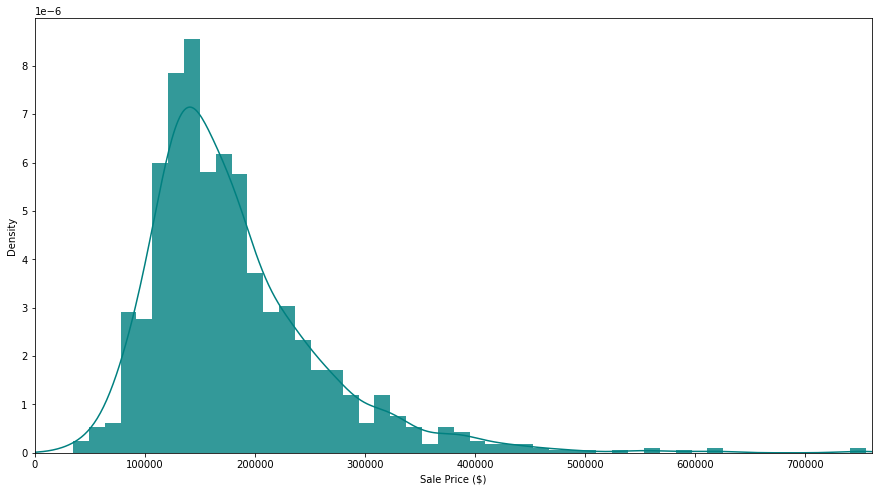

In [12]:
plt.figure(figsize=(15,8))
ax = ames['SalePrice'].hist(bins=50, density=True, stacked=True, color='teal', alpha=0.8)
ames['SalePrice'].plot(kind='density', color='teal')
ax.set(xlabel='Sale Price ($)')
plt.xlim(0,760000)
plt.show()

### Overall Correlation
I then looked at the correlation between the numerical features:



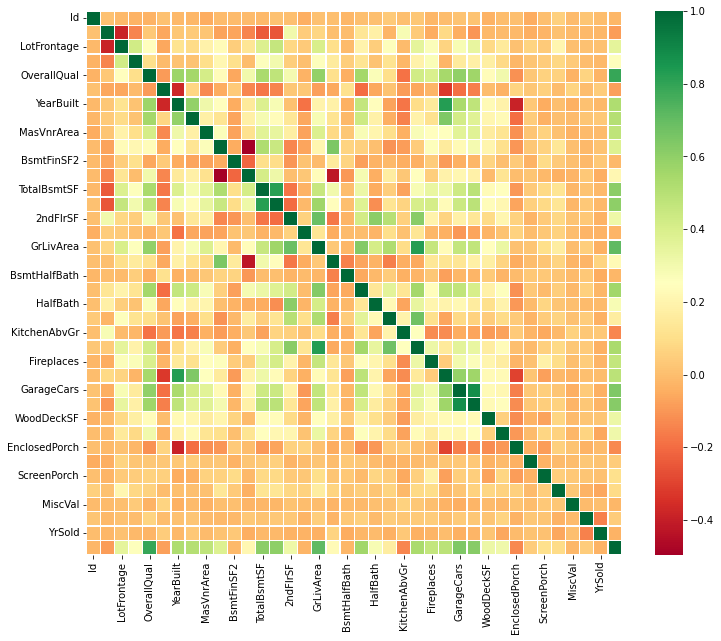

In [13]:
ames_corr = ames.corr()
sns.heatmap(ames_corr, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

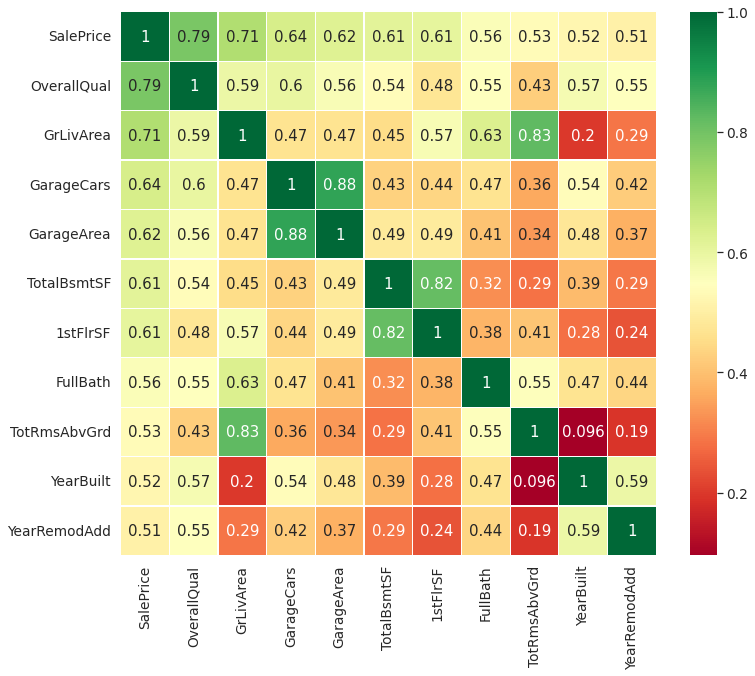

In [14]:
high_corr_cols = ames_corr.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames[high_corr_cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, cmap = 'RdYlGn', linewidths = 0.2, yticklabels=high_corr_cols.values, xticklabels=high_corr_cols.values)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()


**Observations - Collinearity between predictor variables** 

When predictor variables in the same regression model are correlated, they cannot independently predict the value of the dependent variable.

* `GarageCars` (size of garage in car capacity) and `GarageArea` - size of garage in square feet strongly-correlated. The no. of cars that fit into the garage is a consequence of the garage area; therefore we just need one of these variables. We'll keep `GarageCars` as slightly more strongly correlated.
* Same with `TotalBsmtSF` (total square feet of basement area) & `1stFlrSF` (1st floor square feet). We will keep `1stFlrSF`.
* Same with `TotRmsAbvGrd` (total rooms above grade excluding bathrooms) & `GrLivArea` (above grade living area in square feet). We will keep `GrLivArea` as it is more 


---



---



In [15]:
###initiate list of columns to drop
cols_to_drop=['GarageArea','TotalBsmtSF','TotRmsAbvGrd']


### Check relationship between predictor variables and `SalePrice`

Next, I looked more closely at the correlation between the predictor variables and `SalePrice`.





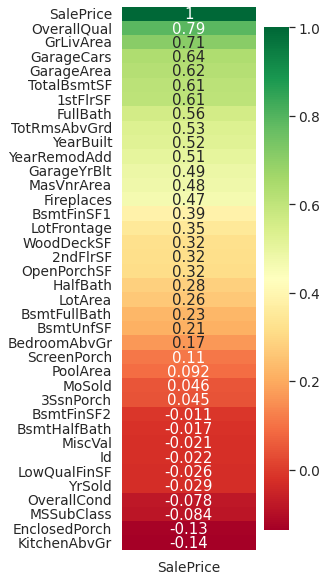

In [16]:
target_corr = ames_corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False)
plt.figure(figsize=(3,10))
sns.heatmap(target_corr, annot = True, cmap = 'RdYlGn')

**Observations - Correlation with `SalePrice`**

The following features are strongly correlated with `SalePrice`
* `OverallQual` - 0.79
* `YearBuilt` - 0.52
* `YearRemodAdd` - 0.51
* `TotalBsmtSF` - 0.61
* `1stFlrSF` - 0.61
* `GrLivArea` - 0.71
* `FullBath` - 0.56
* `TotRmsAbvGrd` - 0.53
* `GarageCars` - 0.64
* `GarageArea` - 0.62

For simplicity, we will drop the columns with correlation under 0.05. 


In [19]:
### add weakly-correlated variables to list of columns to drop

corr = ames.corr()['SalePrice']
low_corr_cols = list(corr[(corr.abs()<0.05)].index)
cols_to_drop += low_corr_cols
print(cols_to_drop)

['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold']


### Exploring key variables

**`OverallQual` - Overall Quality**

The sale price increases as the `OverallQual` increases. 

`OverallQual` is a rating of the overall material and finish of the house on a scale of 1-10 where 1 is 'Very Poor' and 10 is 'Very Excellent'. However, we don't know how this rating is decided.

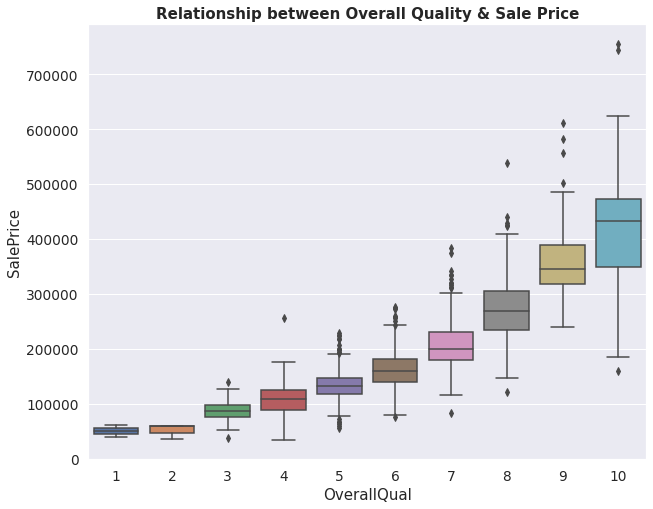

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(data=ames, x=ames['OverallQual'], y=ames['SalePrice'])
plt.title('Relationship between Overall Quality & Sale Price', fontweight='bold', fontsize=15)
plt.show()

**`GrLivArea` - Above grade (ground) living area square feet**

As expected, there is a general positive relationship. **The bigger the house, the more expensive it is.**


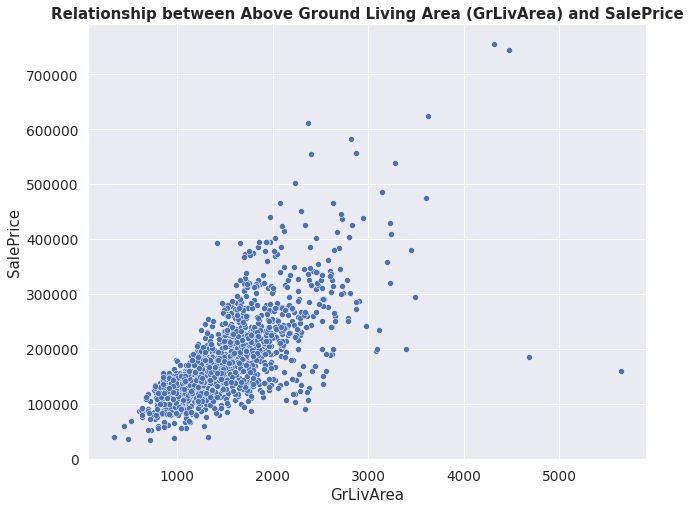

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=ames, x=ames['GrLivArea'], y=ames['SalePrice'])
plt.title('Relationship between Above Ground Living Area (GrLivArea) and SalePrice', fontweight='bold', fontsize=15)
plt.show()

**Size of garage in car capacity `GarageCars`**
There is a general positive trend. i.e. **The more cars that can fit in the garage, the higher the sale price.** 

However, we see an **anomaly for houses with a 4-car garage**. We need to look at this more closely - this may be because we don't have enough datapoints for houses with a garage of this size. 

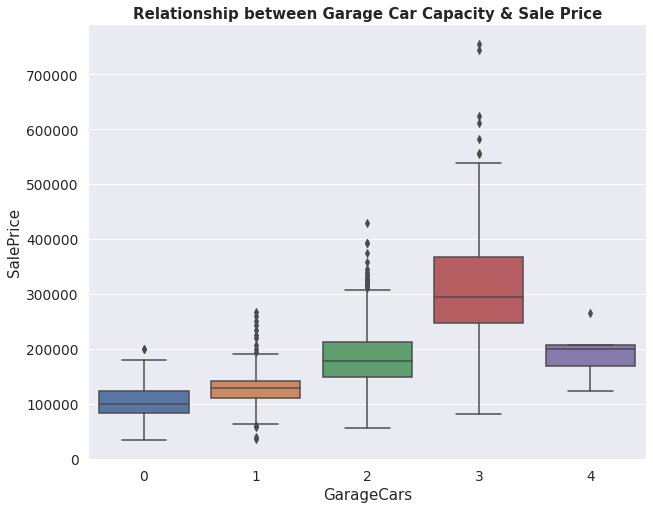

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=ames, x=ames['GarageCars'], y=ames['SalePrice'])
plt.title('Relationship between Garage Car Capacity & Sale Price', fontweight='bold', fontsize=15)
plt.show()

## Feature Engineering

I created a new function transform_feats() that transforms the training dataset as follows:


In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the no. of missing values or data leakage
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
* create new features by combining other features

### Drop Columns that Leak Information About the Target

Data leakage is a problem that can generate overfitting. It refers to columns that reveal information about the sale that would most probably not be available until the moment the house is sold. 

Therefore, these features should not be included in the model. Below, we identify 3 columns which may leak data from the target column.

In [22]:
irrelevant_cols = ['LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical']
cols_to_drop += irrelevant_cols
print(cols_to_drop)

['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical']


### Check Missing Values
I created the following function to check missing values along the way.

In [23]:
def check_missing_vals(df):
  total_missing = df.isnull().sum()
  percent_missing = ((df.isnull().sum()/df.isnull().count()))*100
  if 'SalePrice' in df.columns: 
    saleprice_corr = df.corr()['SalePrice'].abs()
  else:
    saleprice_corr = (df.count())*np.NaN
  missing_vals = pd.concat([total_missing, percent_missing, saleprice_corr], axis=1,keys=['TotalMissing','PercentMissing', 'CorrCoeff.'])
  missing_vals_df = missing_vals[total_missing>0].sort_values(ascending=False,by='TotalMissing')
  print(missing_vals_df)
  
check_missing_vals(ames)

              TotalMissing  PercentMissing  CorrCoeff.
PoolQC                1453       99.520548         NaN
MiscFeature           1406       96.301370         NaN
Alley                 1369       93.767123         NaN
Fence                 1179       80.753425         NaN
FireplaceQu            690       47.260274         NaN
LotFrontage            259       17.739726    0.351799
GarageType              81        5.547945         NaN
GarageYrBlt             81        5.547945    0.486362
GarageFinish            81        5.547945         NaN
GarageQual              81        5.547945         NaN
GarageCond              81        5.547945         NaN
BsmtExposure            38        2.602740         NaN
BsmtFinType2            38        2.602740         NaN
BsmtFinType1            37        2.534247         NaN
BsmtCond                37        2.534247         NaN
BsmtQual                37        2.534247         NaN
MasVnrArea               8        0.547945    0.477493
MasVnrType

### Missing Values - Test
As we can see below, there are a few columns with a large percentage of missing values. I added in the correlation coefficient where applicable so I can check correlation with `SalePrice`.

In [24]:
check_missing_vals(ames_test)

              TotalMissing  PercentMissing  CorrCoeff.
PoolQC                1456       99.794380         NaN
MiscFeature           1408       96.504455         NaN
Alley                 1352       92.666210         NaN
Fence                 1169       80.123372         NaN
FireplaceQu            730       50.034270         NaN
LotFrontage            227       15.558602         NaN
GarageCond              78        5.346127         NaN
GarageYrBlt             78        5.346127         NaN
GarageQual              78        5.346127         NaN
GarageFinish            78        5.346127         NaN
GarageType              76        5.209047         NaN
BsmtCond                45        3.084304         NaN
BsmtExposure            44        3.015764         NaN
BsmtQual                44        3.015764         NaN
BsmtFinType1            42        2.878684         NaN
BsmtFinType2            42        2.878684         NaN
MasVnrType              16        1.096642         NaN
MasVnrArea

### Remove columns with more than 15% missing values

* PoolQC - Pool Quality 
* MiscFeature - Miscellaneous feature not covered in other categories e.g. Elevator, 2nd Garage, Other, Shed, etc.
* Alley - Type of alley access to property (Gravel, paved, no alley access)
* Fence - Fence quality, good privacy, minimum privacy, good wood,, minimum wood/ wire
* FireplaceQu - Fireplace quality
* LotFrontage - Linear feet of street connected to property

In [25]:
#add columns with over 15% missing values to list of columns to drop later

percent_missing = ((ames.isnull().sum()/ames.isnull().count()))*100
over_15_missing = list(percent_missing[percent_missing>15].index)
cols_to_drop += over_15_missing
print(cols_to_drop)


['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


### Imputing Missing Values - Garage Features

**The following columns describing features of the Garage all have 81 missing values.** Below, we see that **they are missing in the same rows.**

* `GarageType`
* `GarageYrBlt`
* `GarageFinish`
* `GarageQual`
* `GarageCond`

Based on the data documentation, the value **NA** in the following columns suggests **'None'** - so it is reasonable to assume that the missing Garage values are houses without one.

In [26]:
### save data points with missing garage columns into a new dataframe

garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
missing_garage_df = ames[ames[garage_cols].isnull().all(1)]
print(missing_garage_df[garage_cols])

     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
39          NaN          NaN          NaN        NaN        NaN
48          NaN          NaN          NaN        NaN        NaN
78          NaN          NaN          NaN        NaN        NaN
88          NaN          NaN          NaN        NaN        NaN
89          NaN          NaN          NaN        NaN        NaN
...         ...          ...          ...        ...        ...
1349        NaN          NaN          NaN        NaN        NaN
1407        NaN          NaN          NaN        NaN        NaN
1449        NaN          NaN          NaN        NaN        NaN
1450        NaN          NaN          NaN        NaN        NaN
1453        NaN          NaN          NaN        NaN        NaN

[81 rows x 5 columns]


In [27]:
missing_garage_df['SalePrice'].describe()

count        81.000000
mean     103317.283951
std       32815.023389
min       34900.000000
25%       82500.000000
50%      100000.000000
75%      124000.000000
max      200500.000000
Name: SalePrice, dtype: float64

In [28]:
ames[garage_cols].value_counts()

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
Attchd      2006.0       RFn           TA          TA            33
            2005.0       Fin           TA          TA            28
            2007.0       Fin           TA          TA            21
            2004.0       RFn           TA          TA            20
            2005.0       RFn           TA          TA            19
                                                                 ..
            1987.0       Unf           TA          TA             1
Detchd      1920.0       Unf           Po          Po             1
                                       TA          Fa             1
Attchd      1987.0       RFn           TA          TA             1
2Types      1920.0       Unf           Fa          Fa             1
Length: 437, dtype: int64

In [29]:
## we can now drop YearBuilt & YearRemodAdd as well as other irrelevant columns

cols_to_drop += ['YearBuilt', 'YearRemodAdd', 'Id', 'GarageYrBlt']
print(cols_to_drop)

['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'YearBuilt', 'YearRemodAdd', 'Id', 'GarageYrBlt']


I would expect the `missing_garage_df` to be on the lower end of the `SalePrice` range.

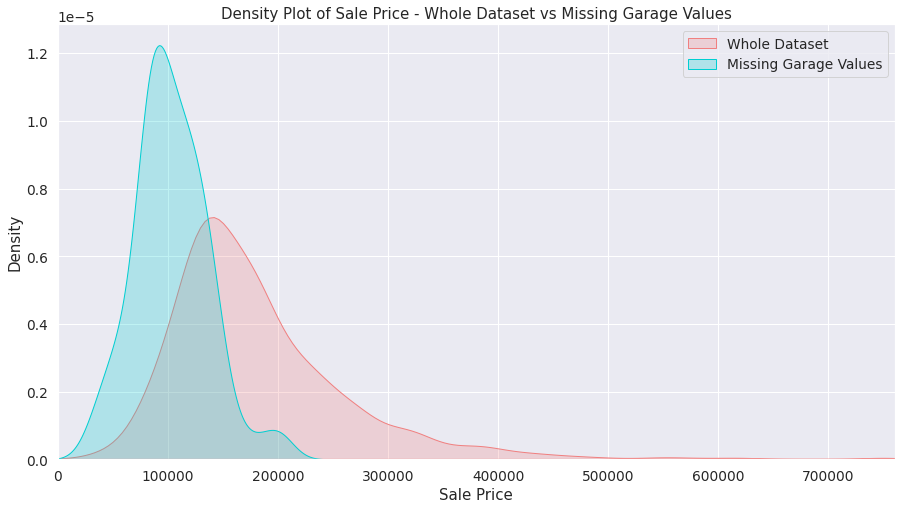

In [30]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(ames['SalePrice'], color='lightcoral', shade = True)
sns.kdeplot(missing_garage_df['SalePrice'], color='darkturquoise', shade = True)
plt.legend(['Whole Dataset', 'Missing Garage Values'])
plt.title('Density Plot of Sale Price - Whole Dataset vs Missing Garage Values')
ax.set(xlabel = 'Sale Price')
plt.xlim(0, 760000)
plt.show()

### Imputing missing values - Basement
Like the columns describing Garage features, we can see that **there is a similar number of missing values in the columns describing features of the basement.**
* BsmtExposure            38
* BsmtFinType2            38 
* BsmtFinType1            37 
* BsmtCond                37 
* BsmtQual                37 

In [31]:
### imputing missing values - Basement
#BsmtExposure            38        2.602740         NaN
#BsmtFinType2            38        2.602740         NaN
#BsmtFinType1            37        2.534247         NaN
#BsmtCond                37        2.534247         NaN
#BsmtQual                37        2.534247         NaN

bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
missing_bsmt_df = ames[ames[bsmt_cols].isnull().all(1)]
print(missing_bsmt_df[bsmt_cols])

     BsmtExposure BsmtFinType2 BsmtFinType1 BsmtCond BsmtQual
17            NaN          NaN          NaN      NaN      NaN
39            NaN          NaN          NaN      NaN      NaN
90            NaN          NaN          NaN      NaN      NaN
102           NaN          NaN          NaN      NaN      NaN
156           NaN          NaN          NaN      NaN      NaN
182           NaN          NaN          NaN      NaN      NaN
259           NaN          NaN          NaN      NaN      NaN
342           NaN          NaN          NaN      NaN      NaN
362           NaN          NaN          NaN      NaN      NaN
371           NaN          NaN          NaN      NaN      NaN
392           NaN          NaN          NaN      NaN      NaN
520           NaN          NaN          NaN      NaN      NaN
532           NaN          NaN          NaN      NaN      NaN
533           NaN          NaN          NaN      NaN      NaN
553           NaN          NaN          NaN      NaN      NaN
646     

In [32]:
missing_bsmt_df.shape

(37, 81)

In [33]:
ames[bsmt_cols].value_counts()

BsmtExposure  BsmtFinType2  BsmtFinType1  BsmtCond  BsmtQual
No            Unf           Unf           TA        TA          148
                                                    Gd          136
                            GLQ           TA        Gd          126
Av            Unf           GLQ           TA        Gd           74
No            Unf           ALQ           TA        TA           73
                                                               ... 
Mn            Unf           LwQ           TA        Gd            1
Gd            LwQ           GLQ           Gd        Gd            1
                                          TA        Gd            1
                                                    TA            1
Av            ALQ           BLQ           TA        Gd            1
Length: 178, dtype: int64

### Imputing Missing Values - Masonry Veneer Type & Masonry Veneer Area
...and the same with Masonry Veneer Type `MasVnrType` and Masonry Veneer Area `MasVnrArea`

In [34]:
### imputing missing values 
# MasVnrArea               8        0.547945    0.477493
# MasVnrType               8        0.547945         NaN
ames['MasVnrType'].value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

**Approx. 60% of houses have been recorded as having no masonry, so it is likely that the missing values do not have this feature.**

In [35]:
masvnr_cols = ['MasVnrArea', 'MasVnrType']
missing_masvnr_df = ames[ames[masvnr_cols].isnull().all(1)]
print(missing_masvnr_df[masvnr_cols])

      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN


I then checked the Sale Price of the missing values under the columns describing the Masonry Veneer feature. **We can see below that there is a high range in sale prices**:

In [36]:
missing_masvnr_df['SalePrice'].value_counts()

216500    1
200624    1
205950    1
184900    1
182000    1
199900    1
465000    1
237000    1
Name: SalePrice, dtype: int64

**The graph below shows the probability that we will find a house between two Sale Price values with a for each type of Masonry Veneer.**

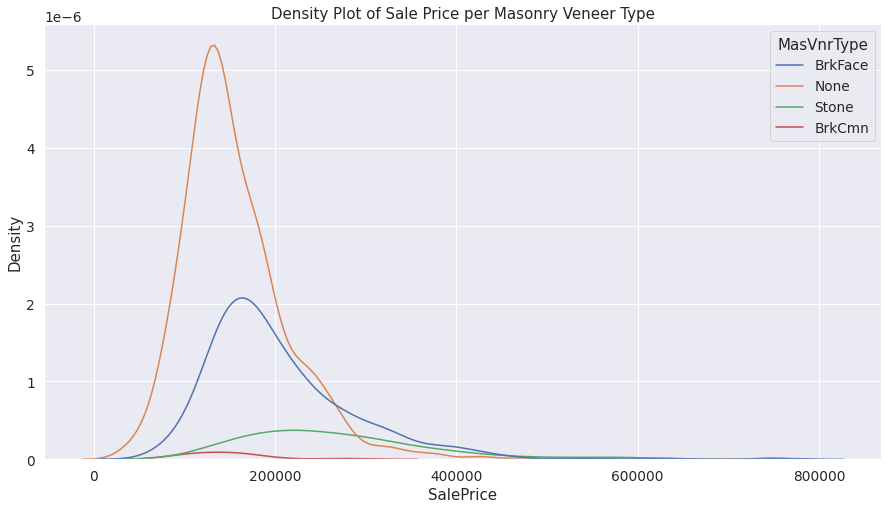

In [37]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=ames, x='SalePrice', hue='MasVnrType')
plt.title('Density Plot of Sale Price per Masonry Veneer Type')
plt.show()

In [38]:
nomasvnr_df = ames[ames['MasVnrType']=='None']
brkface_df = ames[ames['MasVnrType']=='BrkFace']
stone_df = ames[ames['MasVnrType']=='Stone']

If `SalePrice`> 450k, replace with BrkFace (Brick Face) or Stone? 
In the graph below, I compared the 3 most frequently-occuring Masonry Veneer Type.

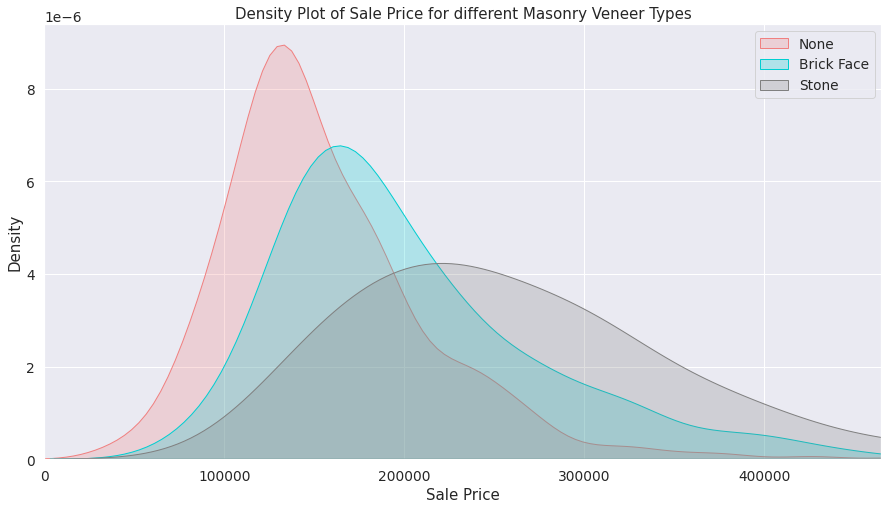

In [39]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(nomasvnr_df['SalePrice'], color='lightcoral', shade = True)
sns.kdeplot(brkface_df['SalePrice'], color='darkturquoise', shade = True)
sns.kdeplot(stone_df['SalePrice'],color='grey',shade=True)
plt.legend(['None', 'Brick Face', 'Stone'])
plt.title('Density Plot of Sale Price for different Masonry Veneer Types')
ax.set(xlabel = 'Sale Price')
plt.xlim(0, 465000)
plt.show()

In [40]:
nomasvnr_df['SalePrice'].describe()

count       864.000000
mean     156221.891204
std       60708.262798
min       34900.000000
25%      118991.000000
50%      143000.000000
75%      181875.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [41]:
brkface_df['SalePrice'].describe()

count       445.000000
mean     204691.871910
std       81214.293554
min       75000.000000
25%      149300.000000
50%      181000.000000
75%      236000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [42]:
stone_df['SalePrice'].describe()

count       128.000000
mean     265583.625000
std       99940.156577
min      119000.000000
25%      194650.000000
50%      246839.000000
75%      312779.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [43]:
brkface_mean = round(brkface_df['MasVnrArea'].mean(),1)
stone_mean = round(stone_df['MasVnrArea'].mean(),1)

print(f'Average Masonry Veneer Area: \n Brick Face: {brkface_mean} \n Stone: {stone_mean} ')


Average Masonry Veneer Area: 
 Brick Face: 259.0 
 Stone: 239.3 


In [44]:
median_area_per_type = ames.groupby('MasVnrType')['MasVnrArea'].median()
median_area = round(median_area_per_type)

mean_area_per_type = ames.groupby('MasVnrType')['MasVnrArea'].mean()
mean_area = round(mean_area_per_type)

area_per_type = pd.concat([median_area, mean_area], axis=1)
print(area_per_type)


            MasVnrArea  MasVnrArea
MasVnrType                        
BrkCmn           192.0       248.0
BrkFace          202.0       259.0
None               0.0         1.0
Stone            206.0       239.0


**We could use the median or mean value per Masonry Veneer Type if we were to use this method to impute the missing values...**

### Dealing with missing values - `Electrical`

* `SBrkr`	Standard Circuit Breakers & Romex
* `FuseA`	Fuse Box over 60 AMP and all Romex wiring (Average)	
* `FuseF`	60 AMP Fuse Box and mostly Romex wiring (Fair)
* `FuseP`	60 AMP Fuse Box and mostly knob & tube wiring (poor)
* `Mix`	Mixed

In [45]:
ames['Electrical'].value_counts(normalize=True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

### Drop irrelevant columns

In [46]:
data_leak_cols = ['SaleCondition', 'SaleType', 'YrSold', 'MoSold']
cols_to_drop += data_leak_cols
print(cols_to_drop)


['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'YearBuilt', 'YearRemodAdd', 'Id', 'GarageYrBlt', 'SaleCondition', 'SaleType', 'YrSold', 'MoSold']


### Dealing with Categorical Values
* columns to category = MSSubClass & OverallCond
* irrelevant columns - 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical'


In [47]:
### update transform_feats function to impute missing values

def transform_feats(df):

  # impute missing values
  for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None') #inplace=False (only change null values)
  # fill in missing values 
  for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    df[col] = df[col].fillna('None')

  df["MasVnrType"] = df["MasVnrType"].fillna("None")
  df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
  df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

  df['YrsSinceBuild'] = df['YrSold'] - df['YearBuilt']
  df['YrsSinceRemod'] = df['YrSold'] - df['YearRemodAdd']

  cols_to_cat = ['MSSubClass', 'OverallCond']
  for col in cols_to_cat:
    df[col] = df[col].astype(str)
  
  #def fill_area(x):
   #for index, mas_vnr_area in zip(median_area.index, median_area.values):
    #if x['MasVnrType'] == index:
     #return mas_vnr_area

  #df['MasVnrArea'] = df.apply(lambda x: fill_area(x) if np.isnan(df['MasVnrArea']) else x['MasVnrArea'], axis=1)

  #drop cols_to_drop
  df.drop(cols_to_drop, axis=1, inplace=True)

  #drop remaining rows with null values (for test dataframe)
  df.dropna()

  return df

In [48]:
transform_feats(ames)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,YrsSinceBuild,YrsSinceRemod
0,60,RL,8450,Pave,Reg,Gtl,CollgCr,1Fam,2Story,7,...,TA,Y,0,61,0,0,0,208500,5,5
1,20,RL,9600,Pave,Reg,Gtl,Veenker,1Fam,1Story,6,...,TA,Y,298,0,0,0,0,181500,31,31
2,60,RL,11250,Pave,IR1,Gtl,CollgCr,1Fam,2Story,7,...,TA,Y,0,42,0,0,0,223500,7,6
3,70,RL,9550,Pave,IR1,Gtl,Crawfor,1Fam,2Story,7,...,TA,Y,0,35,272,0,0,140000,91,36
4,60,RL,14260,Pave,IR1,Gtl,NoRidge,1Fam,2Story,8,...,TA,Y,192,84,0,0,0,250000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Gtl,Gilbert,1Fam,2Story,6,...,TA,Y,0,40,0,0,0,175000,8,7
1456,20,RL,13175,Pave,Reg,Gtl,NWAmes,1Fam,1Story,6,...,TA,Y,349,0,0,0,0,210000,32,22
1457,70,RL,9042,Pave,Reg,Gtl,Crawfor,1Fam,2Story,7,...,TA,Y,0,60,0,0,0,266500,69,4
1458,20,RL,9717,Pave,Reg,Gtl,NAmes,1Fam,1Story,5,...,TA,Y,366,0,112,0,0,142125,60,14


In [49]:
check_missing_vals(ames)

Empty DataFrame
Columns: [TotalMissing, PercentMissing, CorrCoeff.]
Index: []


### Normalize Sale Price

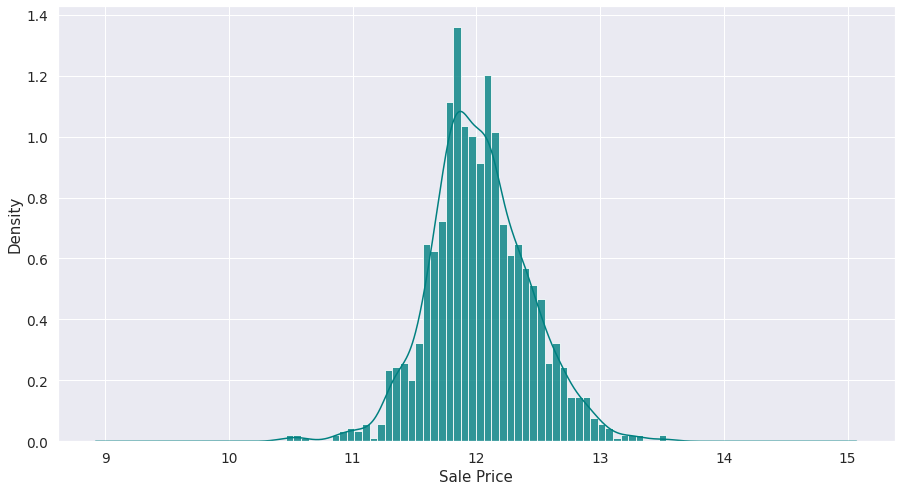

In [50]:
ames['SalePrice'] = np.log1p(ames['SalePrice'])

#check new distribution
plt.figure(figsize=(15,8))
ax = ames['SalePrice'].hist(bins=50, density=True, stacked=True, color='teal', alpha=0.8)
ames['SalePrice'].plot(kind='density', color='teal')
ax.set(xlabel='Sale Price')
plt.show()

mean =0 
std dev = 1

**outliers

**dealing with big numbers

## LabelEncoding



In [51]:
from sklearn.preprocessing import LabelEncoder
cols = ('MSZoning','Street', 'LotShape', 'LandSlope', 'Neighborhood','BldgType','HouseStyle','MasVnrType','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive')
# process columns, apply LabelEncoder to categorical features
for i in cols:
    le = LabelEncoder() 
    ames[i] = le.fit_transform(ames[i].astype(str))

ames

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,YrsSinceBuild,YrsSinceRemod
0,60,3,8450,1,3,0,5,0,5,7,...,5,2,0,61,0,0,0,12.247699,5,5
1,20,3,9600,1,3,0,24,0,2,6,...,5,2,298,0,0,0,0,12.109016,31,31
2,60,3,11250,1,0,0,5,0,5,7,...,5,2,0,42,0,0,0,12.317171,7,6
3,70,3,9550,1,0,0,6,0,5,7,...,5,2,0,35,272,0,0,11.849405,91,36
4,60,3,14260,1,0,0,15,0,5,8,...,5,2,192,84,0,0,0,12.429220,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,0,8,0,5,6,...,5,2,0,40,0,0,0,12.072547,8,7
1456,20,3,13175,1,3,0,14,0,2,6,...,5,2,349,0,0,0,0,12.254868,32,22
1457,70,3,9042,1,3,0,6,0,5,7,...,5,2,0,60,0,0,0,12.493133,69,4
1458,20,3,9717,1,3,0,12,0,2,5,...,5,2,366,0,112,0,0,11.864469,60,14


In [52]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandSlope      1460 non-null   int64  
 6   Neighborhood   1460 non-null   int64  
 7   BldgType       1460 non-null   int64  
 8   HouseStyle     1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   object 
 11  MasVnrType     1460 non-null   int64  
 12  MasVnrArea     1460 non-null   float64
 13  ExterQual      1460 non-null   int64  
 14  ExterCond      1460 non-null   int64  
 15  BsmtQual       1460 non-null   int64  
 16  BsmtCond       1460 non-null   int64  
 17  BsmtExposure   1460 non-null   int64  
 18  BsmtFinT

In [53]:
X = ames.drop(['SalePrice'], axis=1)
y = ames['SalePrice']

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 


### Train, Test, Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regression Models

### Linear Regression

In [58]:
lr_mod = LinearRegression() # define Linear Regression model
lr_mod.fit(X_train, y_train) # fit model onto training data
lr_pred = lr_mod.predict(X_test) # make prediction based on test data


In [59]:
lr_mse = mean_squared_error(y_test,lr_pred) # calculate mean squared error
lr_rmse = mean_squared_error(y_test,lr_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % lr_mse)
print("Root mean squared error: %.2f" % lr_rmse)

Mean squared error: 0.02
Root mean squared error: 0.14


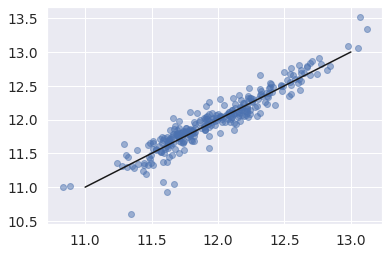

In [60]:
plt.scatter(lr_pred, y_test, alpha=0.5) # plot scatter graph of predicted data from linear regression model vs test data
plt.plot(np.arange(11,14),np.arange(11,14), color='k')


###KNeighbors Regressor

In [61]:
kn_mod = KNeighborsRegressor()
kn_mod.fit(X_train,y_train)
kn_pred = kn_mod.predict(X_test)

In [62]:
kn_mse = mean_squared_error(y_test,kn_pred)
kn_rmse = mean_squared_error(y_test,kn_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % kn_mse)
print("Root mean squared error: %.2f" % kn_rmse)


Mean squared error: 0.03
Root mean squared error: 0.18


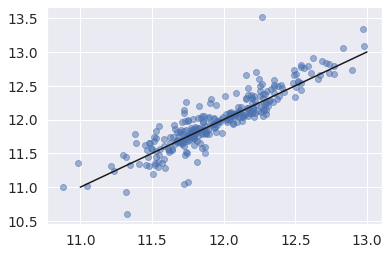

In [63]:
plt.scatter(kn_pred, y_test, alpha = 0.5) #plot scatter graph of predicted data from kneighbors regressor model vs test data
plt.plot(np.arange(11,14),np.arange(11,14), color='k')
plt.show()

### Lasso Regression

In [64]:
la_mod = Lasso(alpha=0.05)
la_mod.fit(X_train,y_train)
la_pred = la_mod.predict(X_test)

In [65]:
la_mse = mean_squared_error(y_test,la_pred)
la_rmse = mean_squared_error(y_test,la_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % la_mse)
print("Root mean squared error: %.2f" % la_rmse)

Mean squared error: 0.03
Root mean squared error: 0.18


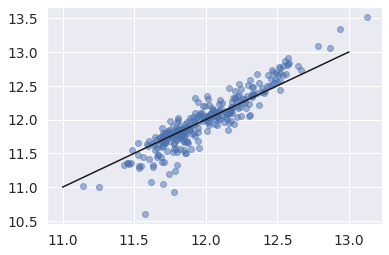

In [66]:
plt.scatter(la_pred, y_test, alpha = 0.5) #plot scatter graph of predicted data from lasso model vs test data
plt.plot(np.arange(11,14),np.arange(11,14), color='k')

### Ridge Regression

In [67]:
rr_mod = Ridge(alpha=0.05)
rr_mod.fit(X_train,y_train)
rr_pred = rr_mod.predict(X_test)

In [68]:
rr_mse = mean_squared_error(y_test,rr_pred)
rr_rmse = mean_squared_error(y_test,rr_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % rr_mse)
print("Root mean squared error: %.2f" % rr_rmse)

Mean squared error: 0.02
Root mean squared error: 0.14


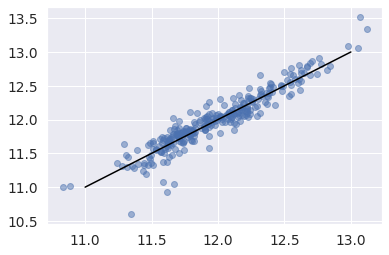

In [69]:
plt.scatter(rr_pred, y_test, alpha = 0.5) #plot scatter graph oh predicted data from ridge regression model vs test data
plt.plot(np.arange(11,14),np.arange(11,14), color='black')

### Bayesian Ridge

In [70]:
br_mod = BayesianRidge()
br_mod.fit(X_train,y_train)
br_pred = br_mod.predict(X_test)

In [71]:
br_mse = mean_squared_error(y_test,br_pred)
br_rmse = mean_squared_error(y_test,br_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % br_mse)
print("Root mean squared error: %.2f" % br_rmse)

Mean squared error: 0.02
Root mean squared error: 0.14


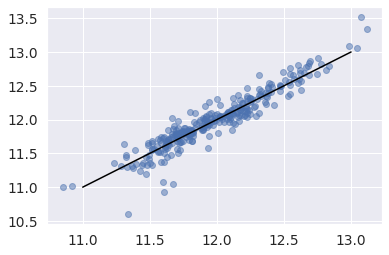

In [72]:
plt.scatter(br_pred, y_test, alpha=0.5) #plot scatter graph of predicted data from bayesian ridge model vs test data
plt.plot(np.arange(11,14),np.arange(11,14), color='black') # 

### Random Forest Regressor

In [73]:
rf_mod = RandomForestRegressor()
rf_mod.fit(X_train,y_train)
rf_pred = rf_mod.predict(X_test)

In [74]:
rf_mse = mean_squared_error(y_test,rf_pred) #calculate mean squared error
rf_rmse = mean_squared_error(y_test,rf_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % rf_mse)
print("Root mean squared error: %.2f" % rf_rmse)

Mean squared error: 0.02
Root mean squared error: 0.14


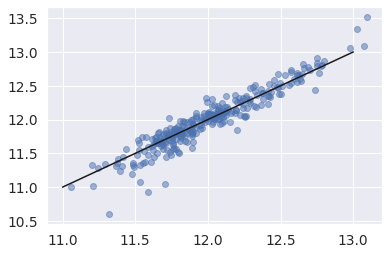

In [75]:
plt.scatter(rf_pred, y_test, alpha=0.5) #plot scatter graph of predicted data from random forest model vs test data
plt.plot(np.arange(11,14),np.arange(11,14), color='k') # plot 1:1

In [77]:
### Final Model Coefficients & Intercept

cdf = pd.DataFrame(np.round(lr_mod.coef_, 2), X.columns, columns=['Coefficients'])
print(cdf.sort_values(by=['Coefficients'], ascending=False))
print('Intercept:       ', round(lr_mod.intercept_,2))

               Coefficients
OverallQual            0.10
GrLivArea              0.09
OverallCond            0.05
GarageCars             0.05
1stFlrSF               0.03
BsmtFullBath           0.03
BedroomAbvGr           0.02
FullBath               0.02
Functional             0.02
WoodDeckSF             0.02
Fireplaces             0.02
LotArea                0.02
ScreenPorch            0.02
EnclosedPorch          0.02
MasVnrType             0.01
CentralAir             0.01
HalfBath               0.01
BsmtCond               0.01
PavedDrive             0.01
ExterCond              0.01
GarageQual             0.00
BsmtFinSF1            -0.00
BsmtFinType2          -0.00
MasVnrArea             0.00
Neighborhood           0.00
GarageFinish          -0.00
LandSlope              0.00
Street                 0.00
OpenPorchSF           -0.00
BsmtUnfSF              0.00
GarageCond            -0.01
GarageType            -0.01
MSSubClass            -0.01
KitchenAbvGr          -0.01
2ndFlrSF            

###Linear Regression Model

**The higher the magnitude of the coefficient, the more important predictor.** Based on the above output, the most important predictors are:
* `OverallQual` - rates overall quality of the house
* `GrLivArea` - area above ground in square feet
* `OverallCond` - rates overall condition of the house
* `GarageCar` - no. of cars that can fit in the garage

* Sale Price = coefficient*(variable) + 12
The higher the magnitude of the coefficient, the more important predictor.

We do not see any strong negative correlation. 

### Next Steps
* Further exploration and analysis of features and thus more informed data cleaning. For example:
  * checking for outliers in `SalePrice` and other features
  * using kNN Imputation to impute missing values (variables are relational) 
  * more analysis of categorical variables 
  * log transform (normalise) other variables which are skewed

* Fine tune model using hyperparameters

* More data visualization and tidying up the graphs!
  * add labels, titles, etc. 

### Submission

In [78]:
# transform test data
# make predictions on test data
# check predicted prices 
# prepare submission csv file 